Only 14 attributes used:
1. #3 (age) 		: age in years
2. #4 (sex) 		: (1 = male; 0 = female)
3. #9 (cp)			: (1 = typical angina, 2= atypical angina, 3 = non-anginal pain)
4. #10 (trestbps) 	: resting blood pressure (in mm Hg on admission to the hospital)
5. #12 (chol) 		: serum cholestoral in mg/dl
6. #16 (fbs)		: (fasting blood sugar > 120 mg/dl) (1 = true; 0 = false)
7. #19 (restecg)	: (0 = normal, 1 = abnormality ST > 0.05 mV , 2 )
8. #32 (thalach)	: maximum heart rate achieved
9. #38 (exang)		: exercise induced angina (1 = yes; 0 = no)
10. #40 (oldpeak)	: ST depression induced by exercise relative to rest
11. #41 (slope)		: the slope of the peak exercise ST segment ( 1 : upsloping , 2: flat , 3: downsloping ) 
12. #44 (ca)		: number of major vessels (0-3) colored by flourosopy
13. #51 (thal)		: 3 = normal; 6 = fixed defect; 7 = reversable defect
14. #58 (num) (the predicted attribute)


Algorithms used.

##### Part A:

    A.1 : Bagging Algo : Random Forest Classifier
    
        A.1.1 : Base Model
        A.1.2 : Hyper Parameter Tuning
                RandomizedCV
                GridSearchCV
            
    A.2 : Boosting Algo : XGBoost Classifier
    
        A.2.1 : Base Model
        A.2.2 : Hyper Parameter Tuning
                GridSearchCV
            
##### Part B:

    B.1 : Logistic Regression
    
##### Part C:

    C.1 : Bagging Algo : Random Forest Regressor
    
        C.1.1 : Base Model
        C.1.2 : Hyper Parameter Tuning
                RandomizedCV
                GridSearchCV
                
    C.2 : Boosting Algo : XGBoost Regressor
    
        C.2.1 : Base Model
        C.2.2 : Hyper Parameter Tuning
                RandomizedCV
                GridSearchCV
    
##### Part D:

    D.1 : Linear Regression 
    
    D.2 : Regression Regularization (like Ridge Regression)
        
        D.2.1 : Base Model
        D.2.2 : Alpha parameter Tuning
                RandomizedCV
                GridSearchCV
        
##### Part E:

    E.1 : Ada Boosting Classifier
    
        E.1.1 : Base Model
        E.1.2 : Hyper parameter Tuning
                GridSearchCV
              
    E.2 : Ada Boosting Regressor
    
        E.2.1 : Base Model
        E.2.2 : Hyper parameter Tuning
                RandomizedCV
              
              
              
##### Model Evalution and Comparision : 

    I.Classification Model
        : accuracy_score
        : Classification_report
            precision  ,  recall  , f1-score  , support
        : Confusion_Matrix
        : Print_Metrics
            logloss , accuracy, precision, F1 , r2 , AUC
        : Check_stats
            loss , avg loss
        : ROC Curve
    
    II.Regression Model
        : Average Error
        : Accuracy
        : Root Mean Squared Error
        : Cross Validation Score
        : Regression Plot
        : QQ Plot
        : Residual plot

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cleveland_file = "./processed.cleveland.data"
cleveland_df = pd.read_csv(cleveland_file, header=None)
cleveland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
cleveland_df = cleveland_df.replace('?', np.nan)


hungarian_file = "./processed.hungarian.data"
hungarian_df = pd.read_csv(hungarian_file, header=None)
hungarian_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
hungarian_df = hungarian_df.replace('?', np.nan)


switzerland_file = "./processed.switzerland.data"
switzerland_df = pd.read_csv(switzerland_file, header=None)
switzerland_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
switzerland_df = switzerland_df.replace('?', np.nan)


va_file = "./processed.va.data"
va_df = pd.read_csv(va_file, header=None)
va_df.columns = ["age", "sex", "cp", "trestbps","chol", "fbs", "restecg","thalach", "exang", "oldpeak", "slope", "ca", "thal", "num"]
va_df = va_df.replace('?', np.nan)

FileNotFoundError: ignored

Missing values in all dataset

In [ ]:
cleveland_nan = pd.DataFrame(cleveland_df.isnull().sum())
hungarian_nan = pd.DataFrame(hungarian_df.isnull().sum())
switzerland_nan = pd.DataFrame(switzerland_df.isnull().sum())
va_nan = pd.DataFrame(va_df.isnull().sum())

Disease_NAN = pd.concat([cleveland_nan, hungarian_nan, switzerland_nan, va_nan], axis=1)
Disease_NAN.columns = ["cleveland NAN", "hungarian NAN", "switzerland NAN", "va NAN"]
Disease_NAN

,cleveland NAN,hungarian NAN,switzerland NAN,va NAN
age,0,0,0,0
sex,0,0,0,0
cp,0,0,0,0
trestbps,0,1,2,56
chol,0,23,0,7
fbs,0,8,75,7
restecg,0,1,1,0
thalach,0,1,1,53
exang,0,1,1,53
oldpeak,0,0,6,56


Merging all dataset into one

In [ ]:
Heart_Disease_DF = pd.concat([cleveland_df,hungarian_df,switzerland_df,va_df])
Heart_Disease_DF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115,0,0,1,92,1,0,2,?,7,1
119,70.0,1.0,4.0,140,0,1,0,157,1,2,2,?,7,3
120,72.0,1.0,3.0,160,0,?,2,114,0,1.6,2,2,?,0
121,73.0,0.0,3.0,160,0,0,1,121,0,0,1,?,3,1


In [ ]:
Heart_Disease_DF = Heart_Disease_DF.replace('?', np.nan)

In [ ]:
Heart_Disease_DF

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145,233,1,2,150,0,2.3,3,0.0,6.0,0
1,67.0,1.0,4.0,160,286,0,2,108,1,1.5,2,3.0,3.0,2
2,67.0,1.0,4.0,120,229,0,2,129,1,2.6,2,2.0,7.0,1
3,37.0,1.0,3.0,130,250,0,0,187,0,3.5,3,0.0,3.0,0
4,41.0,0.0,2.0,130,204,0,2,172,0,1.4,1,0.0,3.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
118,70.0,1.0,4.0,115,0,0,1,92,1,0,2,NaN,7,1
119,70.0,1.0,4.0,140,0,1,0,157,1,2,2,NaN,7,3
120,72.0,1.0,3.0,160,0,NaN,2,114,0,1.6,2,2,NaN,0
121,73.0,0.0,3.0,160,0,0,1,121,0,0,1,NaN,3,1


Cleavelend analysis: imputing 

In [ ]:
##print(df)
##column_means = df. mean()
##df = df. fillna(column_means)
print(cleveland_df)

NameError: ignored

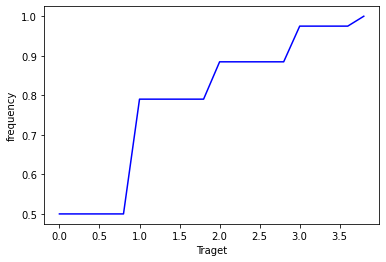

In [ ]:
values, base = np.histogram(Heart_Disease_DF['num'], bins=20)
kumulativ = np.cumsum(values/Heart_Disease_DF.shape[0])
plt.plot(base[:-1], kumulativ, c='blue')
plt.xlabel('Traget')
plt.ylabel('frequency')
plt.show()

<AxesSubplot:>

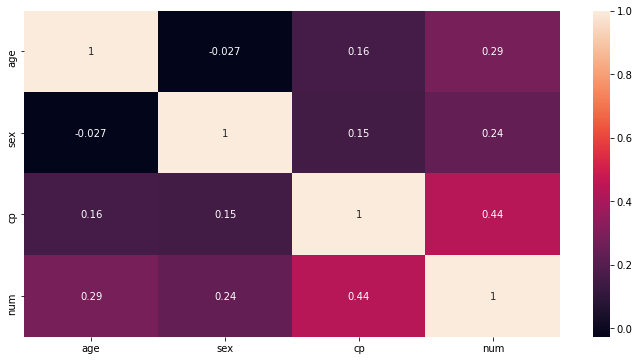

In [ ]:
plt.figure(figsize=(12,6))
sns.heatmap(Heart_Disease_DF.corr(),annot=True)